In [2]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs
from scipy.stats import skew

In [3]:
salary=pd.read_csv('Salary_Data.csv')
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df=salary.copy()
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
df.isnull().sum().values.sum()

12

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [10]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [11]:
df.shape

(373, 6)

In [12]:
df.values

array([[32.0, 'Male', "Bachelor's", 'Software Engineer', 5.0, 90000.0],
       [28.0, 'Female', "Master's", 'Data Analyst', 3.0, 65000.0],
       [45.0, 'Male', 'PhD', 'Senior Manager', 15.0, 150000.0],
       ...,
       [29.0, 'Female', "Bachelor's", 'Junior Project Manager', 2.0,
        40000.0],
       [34.0, 'Male', "Bachelor's", 'Senior Operations Coordinator', 7.0,
        90000.0],
       [44.0, 'Female', 'PhD', 'Senior Business Analyst', 15.0, 150000.0]],
      dtype=object)

In [13]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

categorical data-> Gender, Education level, Job title


quantitative data-> Age, Years of Experience, Salary

In [14]:
df.Gender=df['Gender'].astype("category")
df['Education Level']=df['Education Level'].astype("category")
df['Job Title']=df['Job Title'].astype("category")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  373 non-null    float64 
 1   Gender               373 non-null    category
 2   Education Level      373 non-null    category
 3   Job Title            373 non-null    category
 4   Years of Experience  373 non-null    float64 
 5   Salary               373 non-null    float64 
dtypes: category(3), float64(3)
memory usage: 18.8 KB


In [16]:
df.describe(include="category")

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [17]:
list_df=df.select_dtypes(["category"]).columns
for i in range(len(list_df)):
    print(df[list_df[i]].value_counts())

Male      194
Female    179
Name: Gender, dtype: int64
Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: Job Title, Length: 174, dtype: int64


In [18]:
# list_df=  df.select_dtypes(['category']).columns
# for i in range(len(list_df)):
#      print(list(df[list_df[i]].value_counts().index), list(df[list_df[i]].value_counts()))

(194, 179)


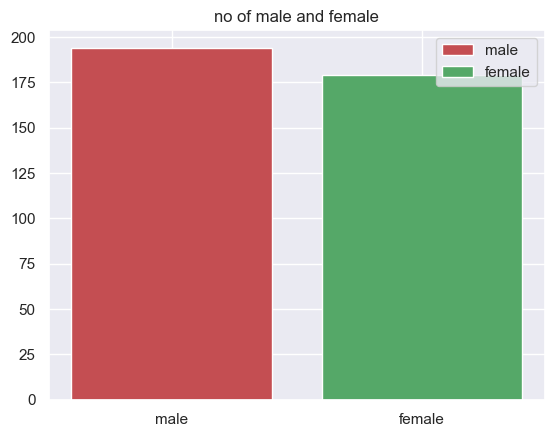

In [19]:
no_of_male = len(df[df['Gender'] == 'Male'])
no_of_female = len(df[df['Gender'] == 'Female'])
print((no_of_male, no_of_female))

plt.bar(['male','female'],[no_of_male,no_of_female],color = ['r','g'],label = ['male','female'])
plt.title("no of male and female")
plt.legend()
plt.show()

(224, 98, 51)


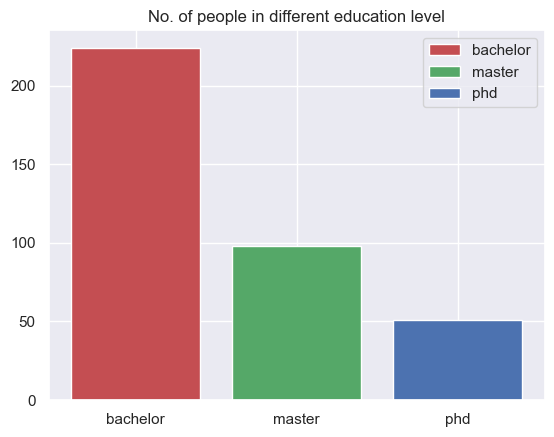

In [20]:
no_of_bachelor = len(df[df['Education Level'] == "Bachelor's"])
no_of_master = len(df[df['Education Level'] == "Master's"])
no_of_phd = len(df[df['Education Level'] == "PhD"])
print((no_of_bachelor, no_of_master, no_of_phd))

plt.bar(['bachelor','master','phd'],[no_of_bachelor, no_of_master, no_of_phd],color = ['r','g','b'],label = ['bachelor','master','phd'])
plt.title("No. of people in different education level")
plt.legend()
plt.show()

In [21]:
data = {}
list_col=  df.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(df[list_col[i]].value_counts())
  subcategory = list(df[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]

data

{'Gender': [['Male', 'Female'], [194, 179]],
 'Education Level': [["Bachelor's", "Master's", 'PhD'], [224, 98, 51]],
 'Job Title': [['Director of Marketing',
   'Director of Operations',
   'Senior Business Analyst',
   'Senior Marketing Analyst',
   'Senior Marketing Manager',
   'Junior Business Analyst',
   'Junior Financial Analyst',
   'Senior Project Manager',
   'Junior Business Development Associate',
   'Senior Financial Analyst',
   'Senior Data Scientist',
   'Senior Product Manager',
   'Senior Software Engineer',
   'Junior Marketing Coordinator',
   'Senior Financial Manager',
   'Senior Product Designer',
   'Senior Operations Manager',
   'Junior Marketing Specialist',
   'Junior Operations Analyst',
   'Junior Project Manager',
   'Senior Project Coordinator',
   'Senior Data Engineer',
   'Senior Marketing Specialist',
   'Senior Operations Coordinator',
   'Senior Business Development Manager',
   'Junior Product Manager',
   'Junior Sales Representative',
   'Junior

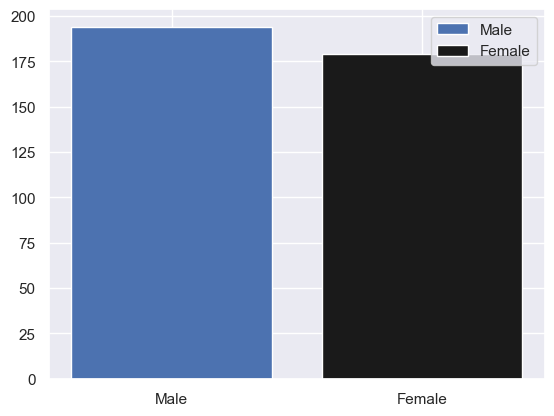

In [22]:
plt.bar(data['Gender'][0],data['Gender'][1],label=['Male', 'Female'],
        color = ['b','k'])
plt.legend()
plt.show()

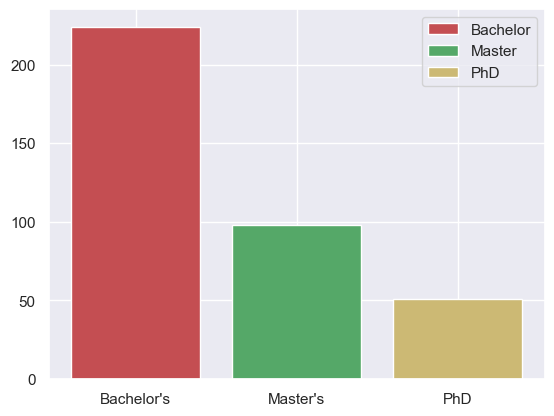

In [23]:
plt.bar(data['Education Level'][0],data['Education Level'][1],label=['Bachelor', 'Master','PhD'],
        color = ['r','g','y'])
plt.legend()
plt.show()

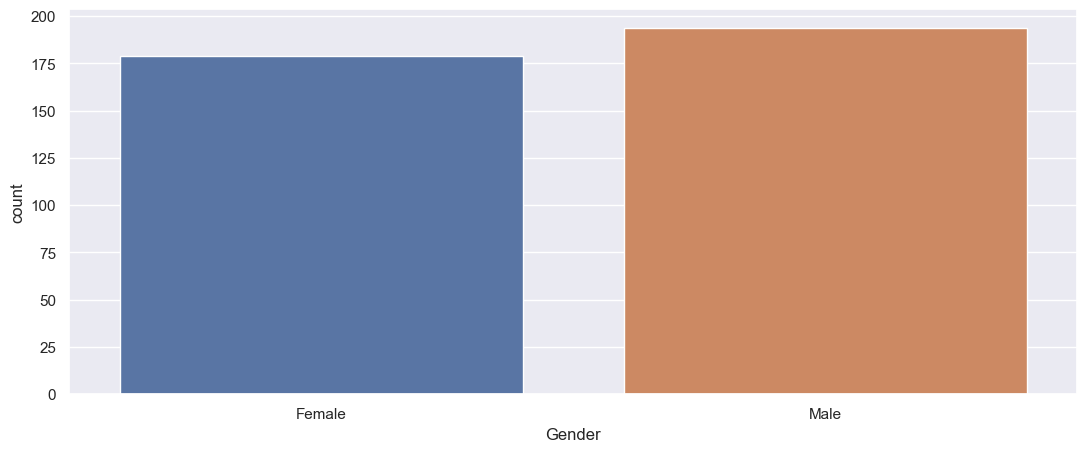

In [24]:
 
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Gender',data=df)

In [25]:
df.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


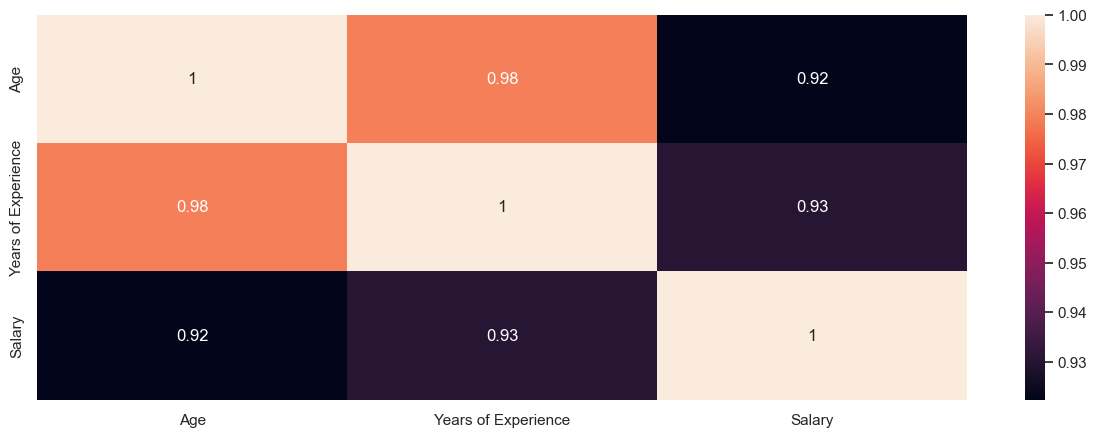

In [26]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

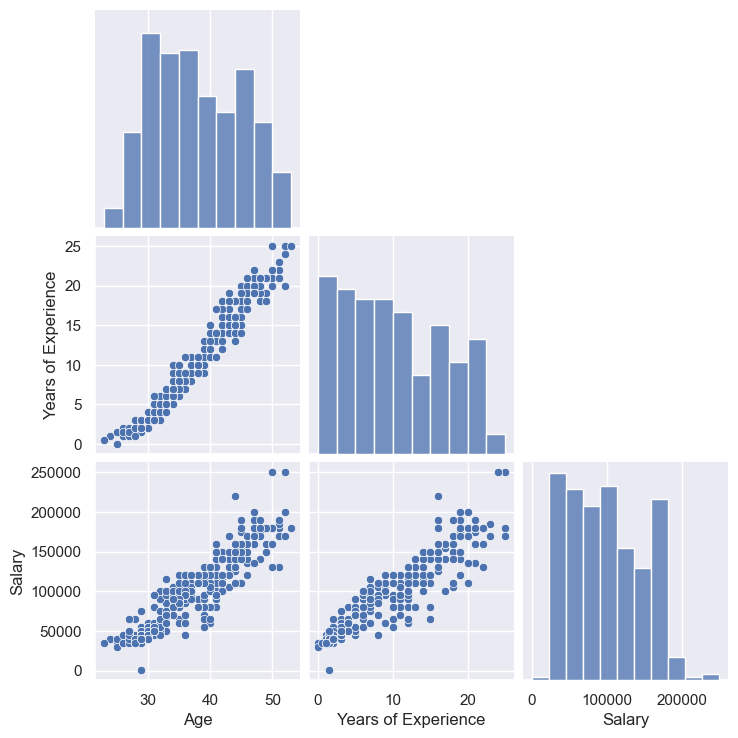

In [27]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df , corner=True)
plt.show()

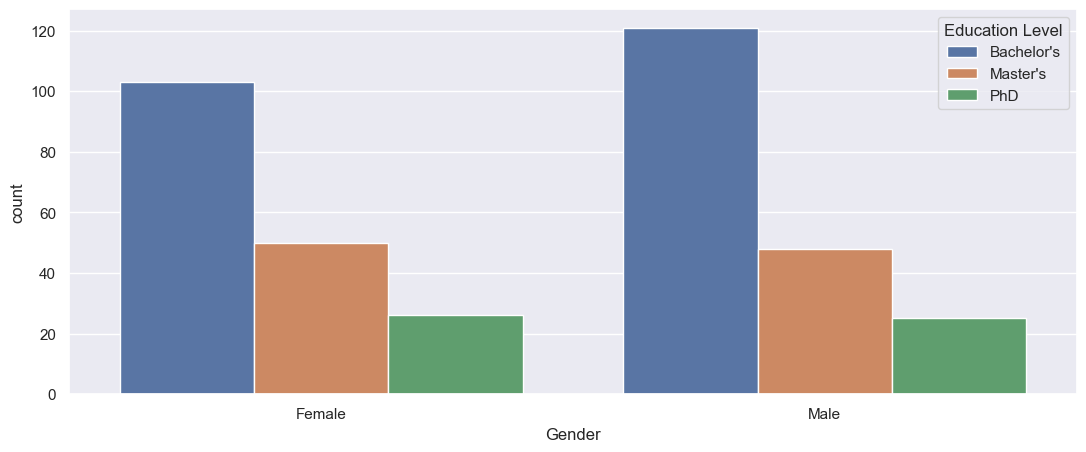

In [28]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Gender',hue='Education Level',data=df)

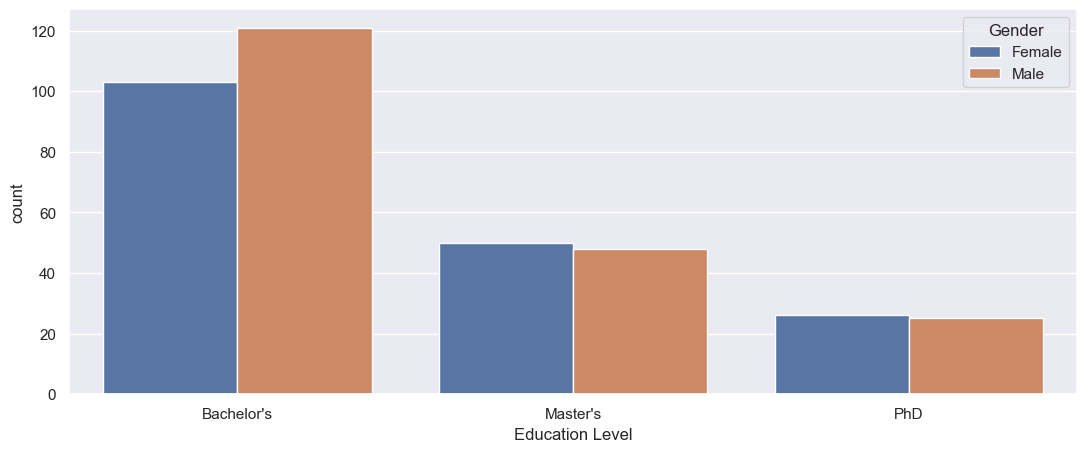

In [29]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Education Level',hue='Gender',data=df)

[Text(0.5, 1.0, 'Gender vs Salary')]

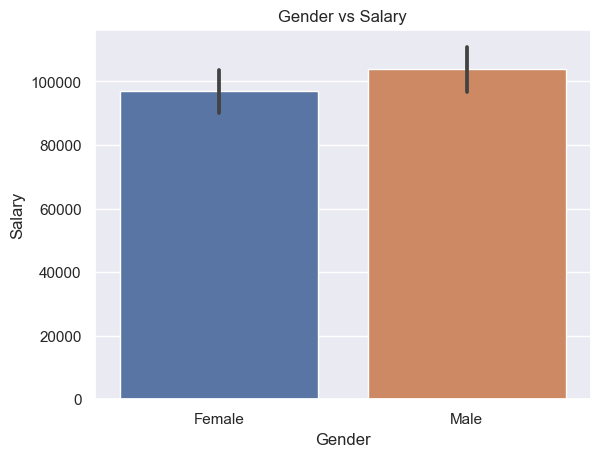

In [30]:
sns.barplot(x=df.Gender,y=df.Salary).set(title="Gender vs Salary")

In [31]:
df.groupby(df.Gender).Salary.mean()

Gender
Female     97011.173184
Male      103867.783505
Name: Salary, dtype: float64

In [32]:
df.groupby(df['Education Level']).Salary.mean()

Education Level
Bachelor's     74756.026786
Master's      129795.918367
PhD           157843.137255
Name: Salary, dtype: float64

In [33]:
df.groupby(df.Gender).Age.mean()

Gender
Female    37.581006
Male      37.293814
Name: Age, dtype: float64

In [34]:
df.groupby(df['Education Level']).Age.mean()

Education Level
Bachelor's    34.312500
Master's      40.765306
PhD           44.725490
Name: Age, dtype: float64

In [35]:
df.groupby(df['Education Level'])['Years of Experience'].mean()


Education Level
Bachelor's     6.966518
Master's      13.397959
PhD           17.019608
Name: Years of Experience, dtype: float64

In [36]:
# Use a list of column names in the groupby method
df.groupby(['Education Level', 'Gender'])['Salary'].mean()


Education Level  Gender
Bachelor's       Female     71019.417476
                 Male       77936.776860
Master's         Female    120200.000000
                 Male      139791.666667
PhD              Female    155384.615385
                 Male      160400.000000
Name: Salary, dtype: float64

In [37]:
df.groupby(['Education Level', 'Gender'])['Salary'].mean().unstack()

Gender,Female,Male
Education Level,,
Bachelor's,71019.417476,77936.776860
Master's,120200.000000,139791.666667
PhD,155384.615385,160400.000000


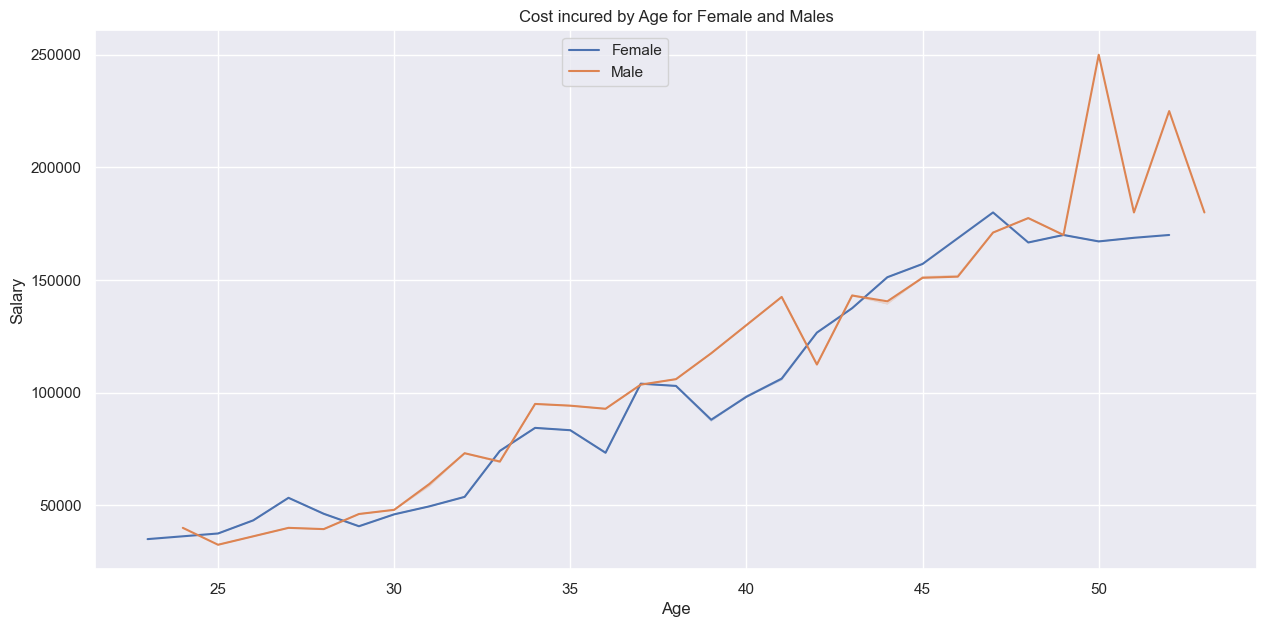

In [42]:
plt.figure(figsize=(15,7))
sns.lineplot(x = df['Age'], y =df['Salary'],hue=df["Gender"],ci=1).set(title= 'Cost incured by Age for Female and Males')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

In [44]:
category1=pd.cut(df.Age,bins=[16,28,38,48,58,68],labels=['16-28','28-38','38-48','48-58','58-68'])
df.insert(6,'AgeBin',category1)

In [46]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,AgeBin
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,28-38
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,16-28
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,38-48
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,28-38
4,52.0,Male,Master's,Director,20.0,200000.0,48-58


In [49]:
age_bin_cat = df.groupby(df.AgeBin).Salary.mean()
age_bin_cat

AgeBin
16-28     40857.142857
28-38     73869.337017
38-48    138484.848485
48-58    177400.000000
58-68              NaN
Name: Salary, dtype: float64

<AxesSubplot: title={'center': 'Agebins vs Salary'}, xlabel='AgeBin'>

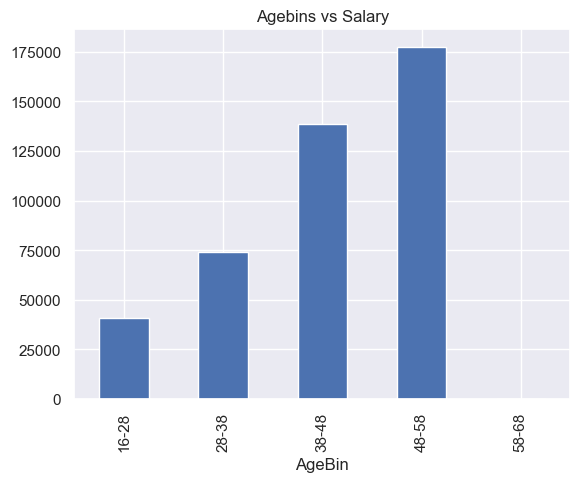

In [51]:
age_bin_cat.plot(kind='bar',title="Agebins vs Salary")